In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l2, l1
import sklearn

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


## Part 1
### i).


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

N = 100
batchsize = 512
epoch_count = 200
split1 = 1/6

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape( (10000, 28 * 28) )
test_images = test_images.astype('float32') / 255

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
fit = network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 37us/step - loss: 0.5105 - acc: 0.8363 - val_loss: 0.2137 - val_acc: 0.9382
Epoch 2/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.1579 - acc: 0.9526 - val_loss: 0.1082 - val_acc: 0.9703
Epoch 3/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.0920 - acc: 0.9721 - val_loss: 0.0904 - val_acc: 0.9747
Epoch 4/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.0658 - acc: 0.9803 - val_loss: 0.0939 - val_acc: 0.9730
Epoch 5/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0471 - acc: 0.9856 - val_loss: 0.0911 - val_acc: 0.9770
Epoch 6/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0347 - acc: 0.9896 - val_loss: 0.0909 - val_acc: 0.9767
Epoch 7/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.0296 - acc: 0.9907 - val_loss: 0.0903 - 

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0043 - acc: 0.9994 - val_loss: 0.2225 - val_acc: 0.9816
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.1877 - val_acc: 0.9829
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0063 - acc: 0.9990 - val_loss: 0.2144 - val_acc: 0.9815
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0067 - acc: 0.9990 - val_loss: 0.2139 - val_acc: 0.9796
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 0.1854 - val_acc: 0.9830
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0062 - acc: 0.9993 - val_loss: 0.1841 - val_acc: 0.9827
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0040 - acc: 0.9994 - val_loss: 0.2041 - val_acc: 0.9810
Epoch 125/200
50000/

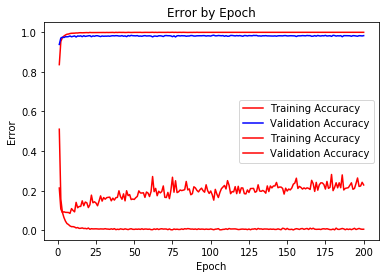

In [4]:
training_error = fit.history['loss']
training_acc = fit.history['acc']
vali_error = fit.history['val_loss']
vali_acc = fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, training_acc, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_acc, 'b',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy by Epoch")
plt.legend()

plt.plot(x_vals, training_error, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_error, 'r',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error by Epoch")
plt.legend()



In [5]:
index_min = np.argmin(vali_error)
print(f"The optimal epoch is {index_min}")

SyntaxError: invalid syntax (<ipython-input-5-c90422437993>, line 2)

### ii.

In [6]:
drop_network = models.Sequential()

drop_network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))


drop_network.add(layers.Dense(10, activation='softmax'))
drop_network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
drop_fit = drop_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 27us/step - loss: 0.7116 - acc: 0.7644 - val_loss: 0.2112 - val_acc: 0.9405
Epoch 2/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.2669 - acc: 0.9225 - val_loss: 0.1423 - val_acc: 0.9586
Epoch 3/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.2005 - acc: 0.9436 - val_loss: 0.1129 - val_acc: 0.9678
Epoch 4/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.1655 - acc: 0.9540 - val_loss: 0.1020 - val_acc: 0.9703
Epoch 5/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.1460 - acc: 0.9588 - val_loss: 0.0973 - val_acc: 0.9729
Epoch 6/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.1301 - acc: 0.9640 - val_loss: 0.0869 - val_acc: 0.9769
Epoch 7/200
50000/50000 [==============================] - 1s 20us/step - loss: 0.1171 - acc: 0.9672 - val_loss: 0.0916 - 

Epoch 118/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0592 - acc: 0.9909 - val_loss: 0.1374 - val_acc: 0.9828
Epoch 119/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0519 - acc: 0.9921 - val_loss: 0.1504 - val_acc: 0.9826
Epoch 120/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0632 - acc: 0.9912 - val_loss: 0.1390 - val_acc: 0.9832
Epoch 121/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0593 - acc: 0.9917 - val_loss: 0.1633 - val_acc: 0.9819
Epoch 122/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0628 - acc: 0.9915 - val_loss: 0.1458 - val_acc: 0.9833
Epoch 123/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0605 - acc: 0.9912 - val_loss: 0.1357 - val_acc: 0.9840
Epoch 124/200
50000/50000 [==============================] - 1s 19us/step - loss: 0.0582 - acc: 0.9917 - val_loss: 0.1408 - val_acc: 0.9838
Epoch 125/200
50000/

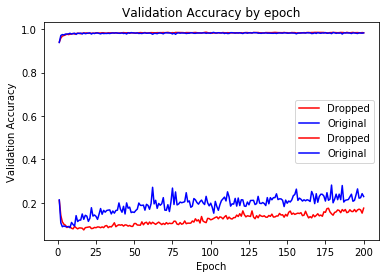

In [9]:
drop_val_error = drop_fit.history['val_loss']
drop_val_acc = drop_fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, drop_val_error,'r',label='Dropped')
plt.plot(x_vals, vali_error,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by epoch")
plt.legend()

plt.plot(x_vals, drop_val_acc,'r',label='Dropped')
plt.plot(x_vals, vali_acc,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by epoch")
plt.legend()

The new model is doing better. 

### iii.

In [10]:

# build artchicture - L1 regularization# build  
# build artchicture

l1_network = models.Sequential()
l1_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(28 * 28,)))


l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))

l1_network.add(layers.Dense(10, activation='softmax'))

# build artchicture - L2 regularization
l2_network = models.Sequential()
l2_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(28 * 28,)))


l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))


l2_network.add(layers.Dense(10, activation='softmax'))


# Fit the model# Fit th 
l1_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l1_fit = l1_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

l2_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l2_fit = l2_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 30us/step - loss: 13.8934 - acc: 0.6682 - val_loss: 4.0829 - val_acc: 0.7869
Epoch 2/200
50000/50000 [==============================] - 1s 18us/step - loss: 3.1023 - acc: 0.7923 - val_loss: 2.4451 - val_acc: 0.8398
Epoch 3/200
50000/50000 [==============================] - 1s 18us/step - loss: 2.2413 - acc: 0.8306 - val_loss: 1.9764 - val_acc: 0.8730
Epoch 4/200
50000/50000 [==============================] - 1s 18us/step - loss: 1.8935 - acc: 0.8578 - val_loss: 1.9440 - val_acc: 0.8053
Epoch 5/200
50000/50000 [==============================] - 1s 18us/step - loss: 1.6958 - acc: 0.8741 - val_loss: 1.6277 - val_acc: 0.8754
Epoch 6/200
50000/50000 [==============================] - 1s 18us/step - loss: 1.5528 - acc: 0.8881 - val_loss: 1.4927 - val_acc: 0.8946
Epoch 7/200
50000/50000 [==============================] - 1s 18us/step - loss: 1.4596 - acc: 0.8964 - val_loss: 1.4084 -

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8909 - acc: 0.9599 - val_loss: 0.9685 - val_acc: 0.9366
Epoch 119/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8899 - acc: 0.9600 - val_loss: 0.8834 - val_acc: 0.9624
Epoch 120/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8894 - acc: 0.9608 - val_loss: 0.9075 - val_acc: 0.9543
Epoch 121/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8889 - acc: 0.9603 - val_loss: 0.8826 - val_acc: 0.9637
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8878 - acc: 0.9612 - val_loss: 0.8963 - val_acc: 0.9580
Epoch 123/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8858 - acc: 0.9614 - val_loss: 0.8863 - val_acc: 0.9620
Epoch 124/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8879 - acc: 0.9607 - val_loss: 0.8866 - val_acc: 0.9625
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 17us/step - loss: 0.1160 - acc: 0.9887 - val_loss: 0.1544 - val_acc: 0.9750
Epoch 35/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1128 - acc: 0.9890 - val_loss: 0.1629 - val_acc: 0.9721
Epoch 36/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1151 - acc: 0.9884 - val_loss: 0.1629 - val_acc: 0.9705
Epoch 37/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1099 - acc: 0.9888 - val_loss: 0.1998 - val_acc: 0.9626
Epoch 38/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1157 - acc: 0.9875 - val_loss: 0.1405 - val_acc: 0.9801
Epoch 39/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1075 - acc: 0.9896 - val_loss: 0.1445 - val_acc: 0.9785
Epoch 40/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.1080 - acc: 0.9895 - val_loss: 0.2474 - val_acc: 0.9547
Epoch 41/200
50000/50000 [==============

50000/50000 [==============================] - 1s 17us/step - loss: 0.0879 - acc: 0.9914 - val_loss: 0.1625 - val_acc: 0.9702
Epoch 94/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0894 - acc: 0.9908 - val_loss: 0.1252 - val_acc: 0.9798
Epoch 95/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0870 - acc: 0.9914 - val_loss: 0.1825 - val_acc: 0.9652
Epoch 96/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0898 - acc: 0.9903 - val_loss: 0.1359 - val_acc: 0.9784
Epoch 97/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0849 - acc: 0.9919 - val_loss: 0.1666 - val_acc: 0.9712
Epoch 98/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0873 - acc: 0.9913 - val_loss: 0.1483 - val_acc: 0.9741
Epoch 99/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0880 - acc: 0.9918 - val_loss: 0.1530 - val_acc: 0.9743
Epoch 100/200
50000/50000 [=============

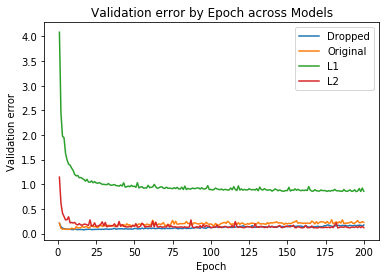

In [11]:

# Plot the training losses of all 4 models# Plot t 
l1_val_error = l1_fit.history['val_loss']
l1_val_acc = l1_fit.history['val_acc']

l2_val_error = l2_fit.history['val_loss']
l2_val_acc = l2_fit.history['val_acc']

plt.plot(x_vals, drop_val_error, label='Dropped' )
plt.plot(x_vals, vali_error, label='Original')
plt.plot(x_vals, l1_val_error, label='L1')
plt.plot(x_vals, l2_val_error, label='L2')
plt.xlabel("Epoch")
plt.ylabel("Validation error")
plt.title("Validation error by Epoch across Models")
plt.legend()

In [12]:
min1=np.min(drop_val_error)
min2=np.min(vali_error)
min3=np.min(l1_val_error)
min4=np.min(l2_val_error)
min1,min2,min3,min4

(0.0757141357421875,
 0.08590075051784515,
 0.8527978826522827,
 0.11579006299972534)

The best model is the dropped one, with the lowest error rate. 

In [13]:
new_epoch_count =  np.argmin(vali_error) + 1
print("The optimal epoch for the main baseline model is:", new_epoch_count)

The optimal epoch for the main baseline model is: 8


In [14]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
full_fit = network.fit(train_images, train_labels, epochs=new_epoch_count, batch_size=batchsize)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Epoch 1/8
60000/60000 [==============================] - 1s 23us/step - loss: 0.0598 - acc: 0.9948
Epoch 2/8
60000/60000 [==============================] - 1s 17us/step - loss: 0.0332 - acc: 0.9961
Epoch 3/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.0229 - acc: 0.9972
Epoch 4/8
60000/60000 [==============================] - 1s 17us/step - loss: 0.0218 - acc: 0.9974
Epoch 5/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.0157 - acc: 0.9980
Epoch 6/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.0175 - acc: 0.9980
Epoch 7/8
60000/60000 [==============================] - 1s 16us/step - loss: 0.0128 - acc: 0.9986
Epoch 8/8
10000/10000 [==============================] - 1s 59us/step
Test accuracy: 0.979
Test loss: 0.18387163691007724
